In [6]:
import numpy as np
import cv2

In [2]:
"""读取模式 彩色：cv2.IMREAD_COLOR 灰度：cv2.IMREAD_GRAYSCALE或者参数0 cv2.IMREAD_UNCHANGED"""
img = cv2.imread('a.JPG',cv2.IMREAD_COLOR) # 图片是三维数组，宽，高，颜色
print(img.shape)
"""WINDOW_NORMAL:可以调节窗口大小 WINDOW_AUTOSIZE:不能调窗口大小--默认模式 """
cv2.namedWindow('image',cv2.WINDOW_AUTOSIZE)
cv2.imshow('image',img)
k = cv2.waitKey(0) # 一直等待键盘输入
if k == 27:        # 输入esc则返回
    cv2.destroyAllWindows()
elif k == ord('s'):
    cv2.imwrite('imwrite.png',img)
    cv2.destroyAllWindows()

(117, 180, 3)


In [7]:
# 摄像头捕捉图像 0是摄像头序号
cap = cv2.VideoCapture(0)
while (True):
    ret , frame = cap.read() # capture frame-by-frame  ret是是否读取成功   frame是图像
#     ret = cap.set(3,1024)
#     ret = cap.set(4,666)
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) 
    cv2.imshow('frame',gray)
    if cv2.waitKey(20) & 0xFF == ord('q'):#waitkey表示多久显示一帧图片
        break
# when everything done,release the capture
cap.release()
cv2.destroyAllWindows()

In [7]:
# 读取视频
cap = cv2.VideoCapture('output.avi')
while (cap.isOpened()):
    ret ,frame = cap.read()
#     gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [5]:
# 摄像头捕获图片，保存视频
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID') # fourcc用4字节表示使用的视频编码格式
out = cv2.VideoWriter('output.avi',fourcc,20.0,(640,480)) #每秒20帧
while cap.isOpened():
    ret,frame = cap.read()
    if ret == True:
        frame = cv2.flip(frame,0)#反转图片
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
out.release()
cv2.destroyAllWindows()

In [55]:
# 绘图函数
# 默认不支持中文
from PIL import Image,ImageDraw,ImageFont
img = np.zeros((500,1000,3),np.uint8) # 高 宽 颜色
# line
cv2.line(img,(0,0),(500,250),(255,0,0),5) #起点，终点，颜色，线宽 -->宽高和画布相反？
#2 rectangle
cv2.rectangle(img,(500,250),(600,350),(0,255,0),4) # 左上角，右下角坐标
font = cv2.FONT_HERSHEY_DUPLEX
cv2.putText(img,'i\'m rectangle',(650,300),font,1,(255,0,0),2,cv2.LINE_AA)

frame_cv2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
frame_pil = Image.fromarray(frame_cv2)  #转为PIL的图片格式
draw = ImageDraw.Draw(frame_pil) 
font = ImageFont.truetype("simhei.ttf", 50, encoding="utf-8")
    # 第一个参数为字体，中文黑体
    # 第二个为字体大小
ImageDraw.Draw(frame_pil).text((100, 20), "这是PIL添加中文字体", (0, 0, 255), font)
img = cv2.cvtColor(np.array(frame_pil), cv2.COLOR_RGB2BGR)


#3 圆和椭圆
cv2.circle(img,(550,300),50,(0,0,255),-1) # 圆心，半径
cv2.ellipse(img,(300,300),(100,50),60,0,300,(255,255,255),-1) #中心，长短轴长，逆时针旋转，椭圆的完整度
#4 多边形
cv2.polylines(img,[np.array([[100,200],[150,200],[150,250],[100,250]],np.int32).reshape((-1,1,2))],True,(0,255,255))
cv2.imshow("example",img)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [61]:
# 鼠标事件
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)
def draw_circle(event,x,y,flags,param):
#     print(event,x,y,flags,param)
    if event == cv2.EVENT_FLAG_LBUTTON:
        cv2.circle(img,(x,y),10,(255,0,0),-1)
img = np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')
while(1):
    cv2.imshow('image',img)
    cv2.setMouseCallback('image',draw_circle)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [2]:
# 滑动条调色
def nothing(x):
    pass
img = np.zeros((500,600,3),np.uint8)
cv2.namedWindow('image')
cv2.createTrackbar('R','image',0,255,nothing) # 滑动条名字 - 滑动条放置窗口 - 滑动默认位置 - 滑动最大位置 - 回调函数
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)
# create switch for ON/OFF
switch = '0:OFF \n1:ON'
cv2.createTrackbar(switch,'image',0,1,nothing)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

In [3]:
# 鼠标事件
def nothing(x):
    pass
drawing = False
mode = True # if true draw rectangle,else draw curve
ix,iy = -1,-1
def draw(event,x,y,flags,param):
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    color = (b,g,r)
    global ix,iy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),color,-1)
        else:
            cv2.circle(img,(x,y),2,color,-1)
    elif event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON: # event看是否移动  flags查看是否按下
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),color,-1)
            else:
                cv2.circle(img,(x,y),5,color,-1)
img = np.zeros([512,512,3],np.uint8)
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.createTrackbar('R','image',0,255,nothing) # 滑动条名字 - 滑动条放置窗口 - 滑动默认位置 - 滑动最大位置 - 回调函数
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)
while(1):
    cv2.imshow('image',img)
    cv2.setMouseCallback('image',draw)
    k = cv2.waitKey(20) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()

In [5]:
# 获取并修改像素值  B G R
img = cv2.imread('a.JPG')
px = img[50,50]
print(px)
blue = img[50,50,0]
print(blue)
# 上面的方法修改像素效率不高，可用下面的方法
print('\n')
print(img.item(50,50,0))
img.itemset((50,50,0),100)

[156 119  93]
156


156


In [9]:
# 获取图像属性：行 列 通道 图像数据类型 像素数目
img = cv2.imread('a.JPG')
print(img.shape) # 返回 行 列 通道数 ，灰度图只返回 行 列
print(img.size,img.dtype)
# 图像ROI  找到大致位置
rocket = img[30:60,40:70]
img[70:100,80:110] = rocket
img = cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(117, 180, 3)
63180 uint8


In [3]:
# 拆分合并通道
img = cv2.imread('a.JPG')
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]
img = cv2.merge([b,g,r])
cv2.imwrite('channel.jpg',img)

True

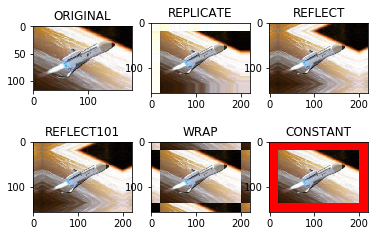

In [12]:
# 为图像扩边
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
"""– cv2.BORDER_CONSTANT 添加有颜色的常数值边界，还需要下一个参数（value）。
　 – cv2.BORDER_REFLECT 边界元素的镜像。比如: fedcba|abcde-fgh|hgfedcb
　 – cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT跟上面一样，但稍作改动。例如: gfedcb|abcdefgh|gfedcba
　 – cv2.BORDER_REPLICATE 重复最后一个元素。例如: aaaaaa|abcdefgh|hhhhhhh  """
blue = [255,0,0]
img = cv2.imread('a.JPG')
replicate = cv2.copyMakeBorder(img,20,20,20,20,cv2.BORDER_REPLICATE) # top bottom left right
reflect = cv2.copyMakeBorder(img,20,20,20,20,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,20,20,20,20,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,20,20,20,20,cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img,20,20,20,20,cv2.BORDER_CONSTANT,value=blue)
plt.subplot(231),plt.imshow(img,cmap='Blues'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

In [19]:
# 图像加法
x = np.uint8([250]) # 0-255
y = np.uint8([10])
print(cv2.add(x,y))
print(x+y)

[[255]]
[4]


In [9]:
# 图像混合　dst = α · img1 + β · img2 + γ
img1 = cv2.imread('opencv-logo-white.png')
print(img1.shape)
img2 = cv2.imread('b.jpg')
print(img2[0,:,].shape)
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        for k in range(img1.shape[2]):
            img2[i,j,k] = img2[i,j,k] * 0.5 + img1[i,j,k] * 0.5

# img1_1 = cv2.resize(img1,(600,337),interpolation=cv2.INTER_CUBIC)

# cv2.add(img2,img1)
# img = cv2.addWeighted(img1,0.5,img2,0.5,0)
cv2.imshow('img',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

(222, 180, 3)
(600, 3)


In [8]:
# 图像位操作
img1 = cv2.imread('opencv-logo-white.png')
img2 = cv2.imread('b.jpg')
rows,cols,channels = img1.shape
roi = img2[0:rows,0:cols] # 大图需要合并的区域
img1gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
cv2.imshow('灰度图',img1gray)
cv2.waitKey(0)
print(img1gray.shape)
ret ,mask = cv2.threshold(img1gray,10,255,cv2.THRESH_BINARY)
cv2.imshow('mask',mask)
cv2.waitKey(0)
mask_inv = cv2.bitwise_not(mask)
cv2.imshow('mask_inv',mask_inv)
img2_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
cv2.imshow('img2_bg',img2_bg)
cv2.waitKey(0)
img1_fg = cv2.bitwise_and(img1,img1,mask = mask)
cv2.imshow('img1_fg',img1_fg)
cv2.waitKey(0)
dst = cv2.add(img2_bg,img1_fg)
img2[0:rows,0:cols] = dst
cv2.imshow('res',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()


(222, 180)
